In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [6]:
"""
depth:深度マップ
ブロックの最大の高さnを指定
"""
def posterization(depth, n):
    th_bin, depth_bin = cv2.threshold(depth,0,255,cv2.THRESH_OTSU)
    ran = th_bin/n
    out = np.zeros_like(depth)
    for i in range(n-1):
        #out = np.where( (i*ran < img)&(img<=(i+1)*ran), (i+1)*(255//n), out )
        out = np.where( (i*ran<=depth)&(depth<(i+1)*ran), n-i, out )
    return out

In [7]:
"""
col_list={"color_name":[r,g,b]}の色のみの画像に変換
"""
def change_col( img_rgb, col_list={"white":[242,243,242],"black":[5,13,19]} ):
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Lab).astype(np.int16)
    img_L, img_a, img_b = cv2.split(img_lab)
    return img_L, img_a, img_b

In [193]:
"""
元画像（RGB画像および深度マップを入力）
LEGOARTの幅resize_wを指定
ブロックの最大の高さblock_hを指定
"""
def main(img_rgb, img_depth, resize_w, block_h):
    Height, Width = img_rgb.shape[:2]
    ratio = resize_w/Width
    resize_rgb = cv2.resize(img_rgb, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    """change_colでresize_rgbを指定した色のみの画像に変換する"""
    resize_depth = cv2.resize(img_depth, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    depth_pos = posterization(resize_depth, block_h)
    
    plt.figure(figsize=(20,15))
    plt.subplot(221)
    plt.imshow(img_rgb[...,::-1])
    plt.subplot(222)
    plt.imshow(img_depth, cmap="gray")
    plt.subplot(223)
    plt.imshow(resize_rgb[...,::-1])
    plt.subplot(224)
    plt.imshow(depth_pos, cmap="gray")
    plt.show()
    return resize_rgb, depth_pos

libpng warning: extreme cHRM chunk cannot be converted to tristimulus values
libpng warning: Invalid cHRM red point


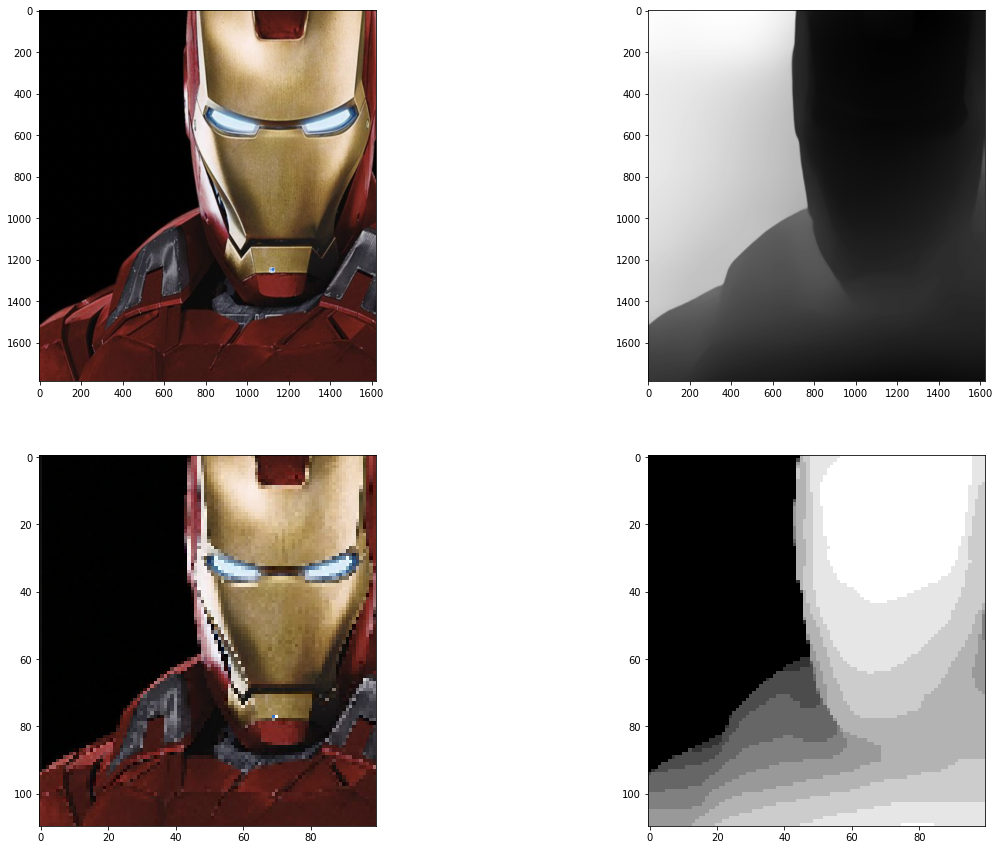

In [207]:
rgb = cv2.imread("./data/aironman.png")
depth = cv2.imread("./data/aironman_depth.png", 0)
depth = 255 - depth
resize_rgb, depth_pos = main(rgb, depth, 100, 10)

In [290]:
col_list = {'White': [242, 243, 242],
 'Tan': [111, 160, 176],
 'Light Green': [168, 217, 173],
 'Maersk Blue': [195, 146, 53],
 'Pink': [255, 217, 171],
 'Nougat': [104, 145, 208],
 'Red': [9, 26, 201],
 'Blue': [191, 85, 0],
 'Yellow': [55, 205, 242],
 'Black': [29, 19, 5],
 'Green': [65, 120, 35],
 'Md,Green': [117, 196, 127],
 'Bt,Green': [65, 171, 88],
 'Dark Orange': [0, 85, 169],
 'Light Violet': [226, 202, 201],
 'Md,Blue': [219, 147, 90],
 'Md,Orange': [11, 167, 255],
 'Orange': [24, 138, 254],
 'Blue-Violet': [202, 116, 104],
 'Light Turquoise': [175, 165, 85],
 'Lime': [11, 233, 187],
 'Magenta': [118, 31, 144],
 'Sand Blue': [161, 116, 96],
 'Md,Nougat': [42, 112, 204],
 'Dark Tan': [115, 138, 149],
 'Dark Blue': [99, 52, 10],
 'Dark Green': [50, 70, 24],
 'Sand Green': [172, 188, 160],
 'Dark Red': [15, 14, 114],
 'Bt,Lt Orange': [61, 187, 248],
 'Reddish Brown': [18, 42, 88],
 'Light Bluish Gray': [169, 165, 160],
 'Dark Bluish Gray': [104, 110, 108],
 'Very Lt, Bluish Gray': [224, 227, 230],
 'Bt, Lt Blue': [233, 195, 159],
 'Dark Pink': [160, 112, 200],
 'Bright Pink': [200, 173, 228],
 'Bt,Lt Yellow': [58, 240, 255],
 'Dark Purple': [145, 54, 63],
 'Light Nougat': [179, 215, 246],
 'Dark Brown': [0, 33, 53],
 'Light Aqua': [234, 242, 211],
 'Md,Lavender': [185, 110, 160],
 'Lavender': [222, 164, 205],
 'Coral': [80, 127, 255]}

In [346]:
def change_coler(img_rgb, col_list):
    Height, Width = img_rgb.shape[:2]
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
    col_list_rgb = np.array([[c_l] for c_l in col_list.values()]).astype(np.uint8)
    col_list_rgb = col_list_rgb.transpose(1, 0, 2)
    col_list_lab = cv2.cvtColor(col_list_rgb, cv2.COLOR_BGR2LAB).astype(np.int16)
    
    plt.figure(figsize=(20,10))
    plt.imshow(col_list_rgb[...,::-1])
    plt.show()
    
    img_L, img_A, img_B = img_lab[...,0], img_lab[...,1], img_lab[...,2]
    list_L, list_A, list_B = col_list_lab[...,0], col_list_lab[...,1], col_list_lab[...,2]
    list_L, list_A, list_B = np.ravel(list_L), np.ravel(list_A), np.ravel(list_B)
    
    """RGBで比較"""
    """
    img_L, img_A, img_B = img_rgb[...,0], img_rgb[...,1], img_rgb[...,2]
    list_L, list_A, list_B = col_list_rgb[...,0], col_list_rgb[...,1], col_list_rgb[...,2]
    list_L, list_A, list_B = np.ravel(list_L), np.ravel(list_A), np.ravel(list_B)
    """
    #各ブロックの色との差を格納
    diff = np.zeros((Height, Width, len(col_list)))
    #一番差が小さいブロックの色のインデックスを格納
    min_col_num = np.zeros((Height, Width))

    for h in range(Height):
        for w in range(Width):
            diff[h,w] = ((float(img_L[h,w]) - list_L)**2 + (float(img_A[h,w]) - list_A)**2 + (float(img_B[h,w]) - list_B)**2)**0.5
            min_col_num[h,w] = np.argmin(diff[h,w])
    
    col_keys = list(col_list.keys())
    Out = np.zeros_like(img_rgb)
    for h in range(Height):
        for w in range(Width):
            Out[h,w] = col_list[col_keys[int(min_col_num[h,w])]]
    
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(img_rgb[...,::-1])
    plt.subplot(122)
    plt.imshow(Out[...,::-1])
    plt.show()
    
    return Out, min_col_num

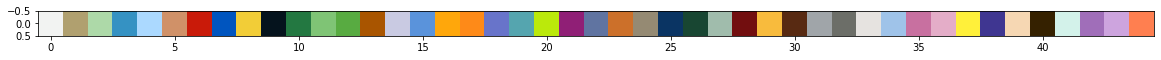

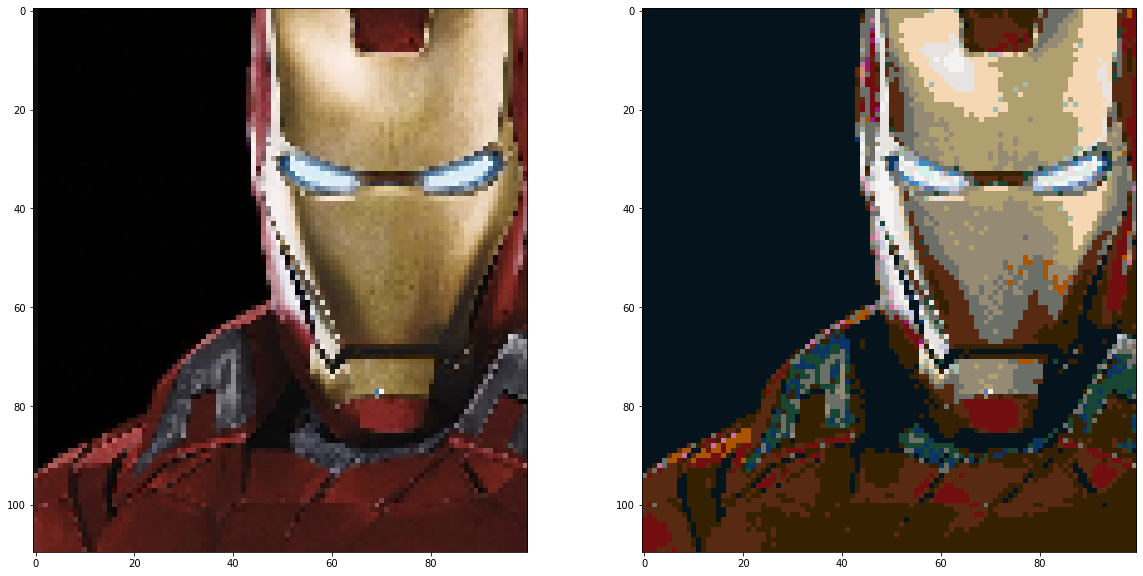

In [347]:
Out, min_col_num = change_coler(resize_rgb, col_list)

### ブロックの色のlist

In [348]:
#col_list = {"color":[b,g,r]}
col_list = {'White': [242, 243, 242],
 'Tan': [111, 160, 176],
 'Light Green': [168, 217, 173],
 'Maersk Blue': [195, 146, 53],
 'Pink': [255, 217, 171],
 'Nougat': [104, 145, 208],
 'Red': [9, 26, 201],
 'Blue': [191, 85, 0],
 'Yellow': [55, 205, 242],
 'Black': [29, 19, 5],
 'Green': [65, 120, 35],
 'Md,Green': [117, 196, 127],
 'Bt,Green': [65, 171, 88],
 'Dark Orange': [0, 85, 169],
 'Light Violet': [226, 202, 201],
 'Md,Blue': [219, 147, 90],
 'Md,Orange': [11, 167, 255],
 'Orange': [24, 138, 254],
 'Blue-Violet': [202, 116, 104],
 'Light Turquoise': [175, 165, 85],
 'Lime': [11, 233, 187],
 'Magenta': [118, 31, 144],
 'Sand Blue': [161, 116, 96],
 'Md,Nougat': [42, 112, 204],
 'Dark Tan': [115, 138, 149],
 'Dark Blue': [99, 52, 10],
 'Dark Green': [50, 70, 24],
 'Sand Green': [172, 188, 160],
 'Dark Red': [15, 14, 114],
 'Bt,Lt Orange': [61, 187, 248],
 'Reddish Brown': [18, 42, 88],
 'Light Bluish Gray': [169, 165, 160],
 'Dark Bluish Gray': [104, 110, 108],
 'Very Lt, Bluish Gray': [224, 227, 230],
 'Bt, Lt Blue': [233, 195, 159],
 'Dark Pink': [160, 112, 200],
 'Bright Pink': [200, 173, 228],
 'Bt,Lt Yellow': [58, 240, 255],
 'Dark Purple': [145, 54, 63],
 'Light Nougat': [179, 215, 246],
 'Dark Brown': [0, 33, 53],
 'Light Aqua': [234, 242, 211],
 'Md,Lavender': [185, 110, 160],
 'Lavender': [222, 164, 205],
 'Coral': [80, 127, 255]}

print(len(col_list))

45


In [351]:
min_col_num = np.ravel(min_col_num).astype(np.int64)
fleq = np.bincount(min_col)

In [352]:
col_fleq = {}
for i, key in enumerate(col_list):
    if i >= len(fleq):
        col_fleq[key] = 0
    else:
        col_fleq[key] = fleq[i]

### 色の出現頻度

In [353]:
print(col_fleq)

{'White': 102, 'Tan': 673, 'Light Green': 0, 'Maersk Blue': 11, 'Pink': 1, 'Nougat': 3, 'Red': 0, 'Blue': 0, 'Yellow': 0, 'Black': 4257, 'Green': 0, 'Md,Green': 0, 'Bt,Green': 0, 'Dark Orange': 63, 'Light Violet': 31, 'Md,Blue': 0, 'Md,Orange': 0, 'Orange': 0, 'Blue-Violet': 1, 'Light Turquoise': 1, 'Lime': 0, 'Magenta': 9, 'Sand Blue': 27, 'Md,Nougat': 0, 'Dark Tan': 686, 'Dark Blue': 105, 'Dark Green': 234, 'Sand Green': 44, 'Dark Red': 359, 'Bt,Lt Orange': 0, 'Reddish Brown': 1211, 'Light Bluish Gray': 60, 'Dark Bluish Gray': 674, 'Very Lt, Bluish Gray': 232, 'Bt, Lt Blue': 12, 'Dark Pink': 21, 'Bright Pink': 11, 'Bt,Lt Yellow': 0, 'Dark Purple': 0, 'Light Nougat': 471, 'Dark Brown': 1686, 'Light Aqua': 15, 'Md,Lavender': 0, 'Lavender': 0, 'Coral': 0}
